In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bluemira.builders.plasma import MakeParameterisedPlasma
from bluemira.equilibria.fem_fixed_boundary.fem_magnetostatic_2D import (
    FemGradShafranovFixedBoundary,
)
from bluemira.equilibria.fem_fixed_boundary.utilities import plot_scalar_field
from bluemira.mesh import meshing
from bluemira.mesh.tools import import_mesh, msh_to_xdmf

import dolfin

# Create a plasma shape

In [2]:
params = {
    "R_0": (9.0, "Input"),
    "A": (3.5, "Input"),
}
build_config = {
    "name": "Plasma",
    "class": "MakeParameterisedPlasma",
    "param_class": "bluemira.equilibria.shapes::JohnerLCFS",
    "variables_map": {
        "r_0": "R_0",
        "a": "A",
    },
}
builder = MakeParameterisedPlasma(params, build_config)
plasma = builder().get_component("xz").get_component("LCFS")

plasma.shape.mesh_options = {"lcar": 0.3, "physical_group": "plasma"}
plasma.shape.boundary[0].mesh_options = {"lcar": 0.3, "physical_group": "lcfs"}

+-------------------------------------------------------------------------+
| Running full build chain for Plasma                                     |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Building Plasma                                                         |
+-------------------------------------------------------------------------+



Initialize and create the mesh

In [3]:
m = meshing.Mesh()
buffer = m(plasma)

+-------------------------------------------------------------------------+
| Starting mesh process...                                                |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| Mesh process completed.                                                 |
+-------------------------------------------------------------------------+



# Convert to xdmf

+-------------------------------------------------------------------------+
| GMSH label      MeshFunction value                                      |
| ------------  --------------------                                      |
| lcfs                             2                                      |
| plasma                           1                                      |
+-------------------------------------------------------------------------+


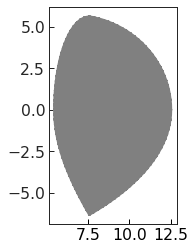

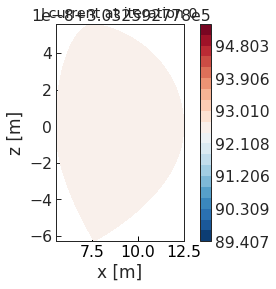

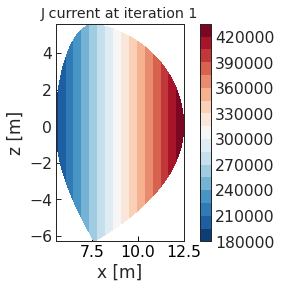

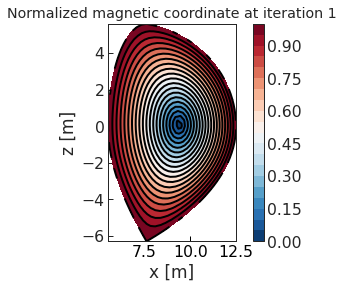

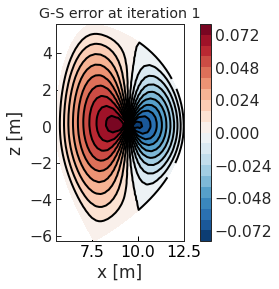

| iter = 1 eps = 4.108E-02 psi_ax : 92.64                                 |

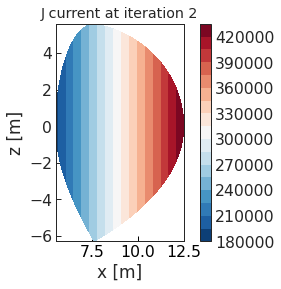

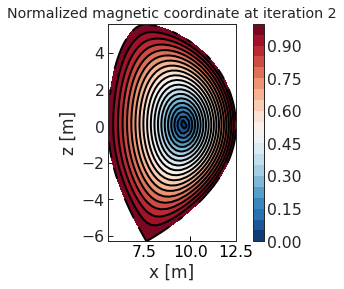

/home/ivan/Desktop/bluemira_project/bluemira/bluemira/equilibria/fem_fixed_boundary/utilities.py:153: UserWarning: No contour levels were found within the data range.
  axis.tricontour(x, y, data, levels=levels, **contour_kwargs)


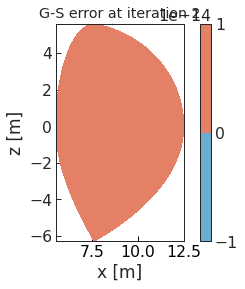

| iter = 2 eps = 0.000E+00 psi_ax : 92.64                                 |

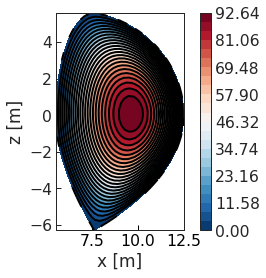

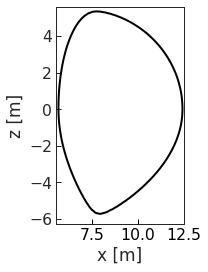

In [4]:
msh_to_xdmf("Mesh.msh", dimensions=(0, 2), directory=".", verbose=True)

mesh, boundaries, subdomains, labels = import_mesh(
    "Mesh",
    directory=".",
    subdomains=True,
)
dolfin.plot(mesh)
plt.show()

Ic = 18e6

gs_solver = FemGradShafranovFixedBoundary(mesh)
gs_solver.solve(1, 0, Ic, max_iter=20, plot=True)

points = mesh.coordinates()
psi_data = np.array([gs_solver.psi(x) for x in points])

levels = np.linspace(0.0, gs_solver.psi_ax, 25)

axis = plot_scalar_field(
    points[:, 0], points[:, 1], psi_data, levels=levels, axis=None, tofill=True
)
plt.show()

axis = plot_scalar_field(
    points[:, 0],
    points[:, 1],
    psi_data,
    levels=[gs_solver.psi_ax * 0.05],
    axis=None,
    tofill=False,
)
plt.show()